# Analyze activation values

### Load data

In [186]:
import numpy as np
fast_model_fast_data = np.load("nighttime_ai_fast_model_fast_data_activations.npy")
fast_model_slow_data = np.load("nighttime_ai_fast_model_slow_data_activations.npy")
slow_model_slow_data = np.load("nighttime_ai_slow_model_slow_data_activations.npy")
slow_model_fast_data = np.load("nighttime_ai_slow_model_fast_data_activations.npy")

[d.shape for d in (fast_model_fast_data, fast_model_slow_data, slow_model_slow_data, slow_model_fast_data)]


[(19250, 256), (20304, 256), (20304, 256), (19250, 256)]

In [187]:
# check if ReLu was applied
[np.min(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_slow_data, slow_model_fast_data)]


[0.0, 0.0, 0.0, 0.0]

In [188]:
[np.max(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_slow_data, slow_model_fast_data)]


[3.988, 3.594, 4.64, 4.88]

In [189]:
[np.mean(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_slow_data, slow_model_fast_data)]


[0.266, 0.2834, 0.3042, 0.2073]

In [190]:
[np.median(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_slow_data, slow_model_fast_data)]


[0.0, 0.0, 0.007706, 0.0]

In [191]:
fast_model_fast_data_neuron_means = np.mean(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_means = np.mean(fast_model_slow_data, axis=0)
slow_model_slow_data_neuron_means = np.mean(slow_model_slow_data, axis=0)
slow_model_fast_data_neuron_means = np.mean(slow_model_fast_data, axis=0)

fast_model_fast_data_neuron_std = np.std(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_std = np.std(fast_model_slow_data, axis=0)
slow_model_slow_data_neuron_std = np.std(slow_model_slow_data, axis=0)
slow_model_fast_data_neuron_std = np.std(slow_model_fast_data, axis=0)

[d.mean() for d in [
    fast_model_fast_data_neuron_means,
    fast_model_slow_data_neuron_means,
    slow_model_slow_data_neuron_means,
    slow_model_fast_data_neuron_means,
]]

[0.266, 0.2837, 0.3042, 0.2073]

In [192]:
[d.std() for d in [
    fast_model_fast_data_neuron_std,
    fast_model_slow_data_neuron_std,
    slow_model_slow_data_neuron_std,
    slow_model_fast_data_neuron_std,
]]

[0.0581, 0.1833, 0.09534, 0.106]

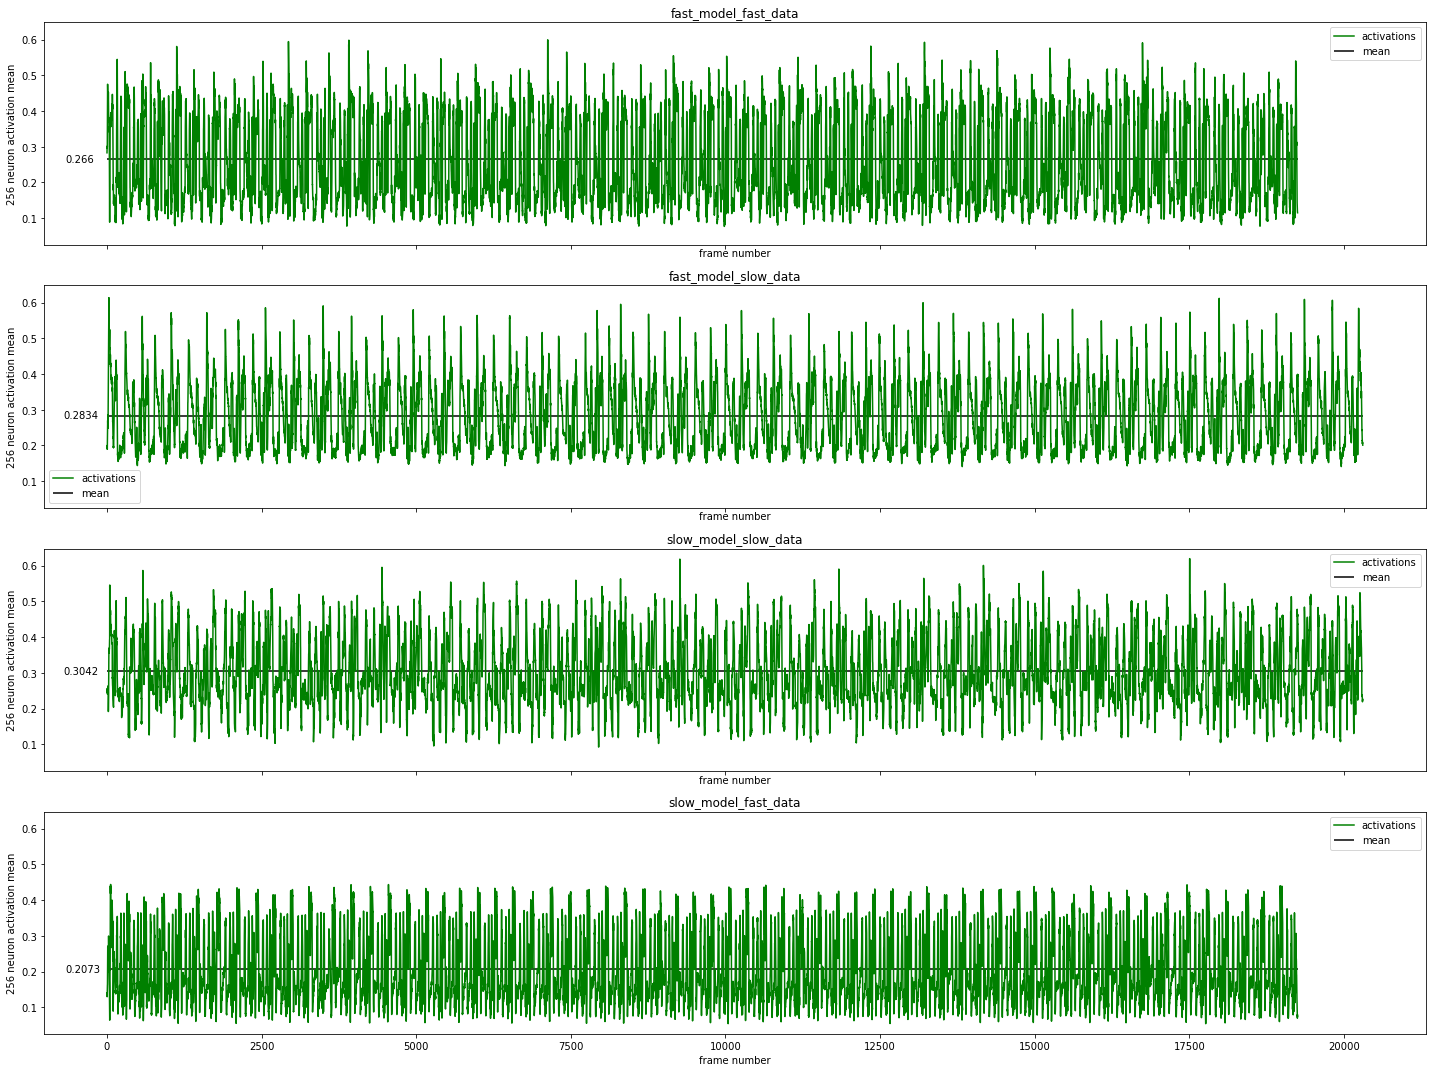

In [193]:
from matplotlib import pyplot as plt

frame_activations = dict(
    fast_model_fast_data=fast_model_fast_data.mean(axis=1),
    fast_model_slow_data=fast_model_slow_data.mean(axis=1),
    slow_model_slow_data=slow_model_slow_data.mean(axis=1),
    slow_model_fast_data=slow_model_fast_data.mean(axis=1),
)

def plot_activations(activations, ylabel, xlabel):
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 15), sharex='all', sharey='all')
    for (name, data), ax in zip(activations.items(), axs.flat):
        ax.set(title=name, ylabel=ylabel, xlabel=xlabel)
        # ax.grid(True, axis='y')
        ax.text(-0.035*len(data), data.mean(), data.mean(), ha='left', va='center')
        ax.hlines(data.mean(), 0, len(data), 'black', label='mean')
        ax.plot(data, 'g', label='activations')
        ax.legend()
    fig.tight_layout()
    plt.show()


plot_activations(frame_activations, '256 neuron activation mean', 'frame number')

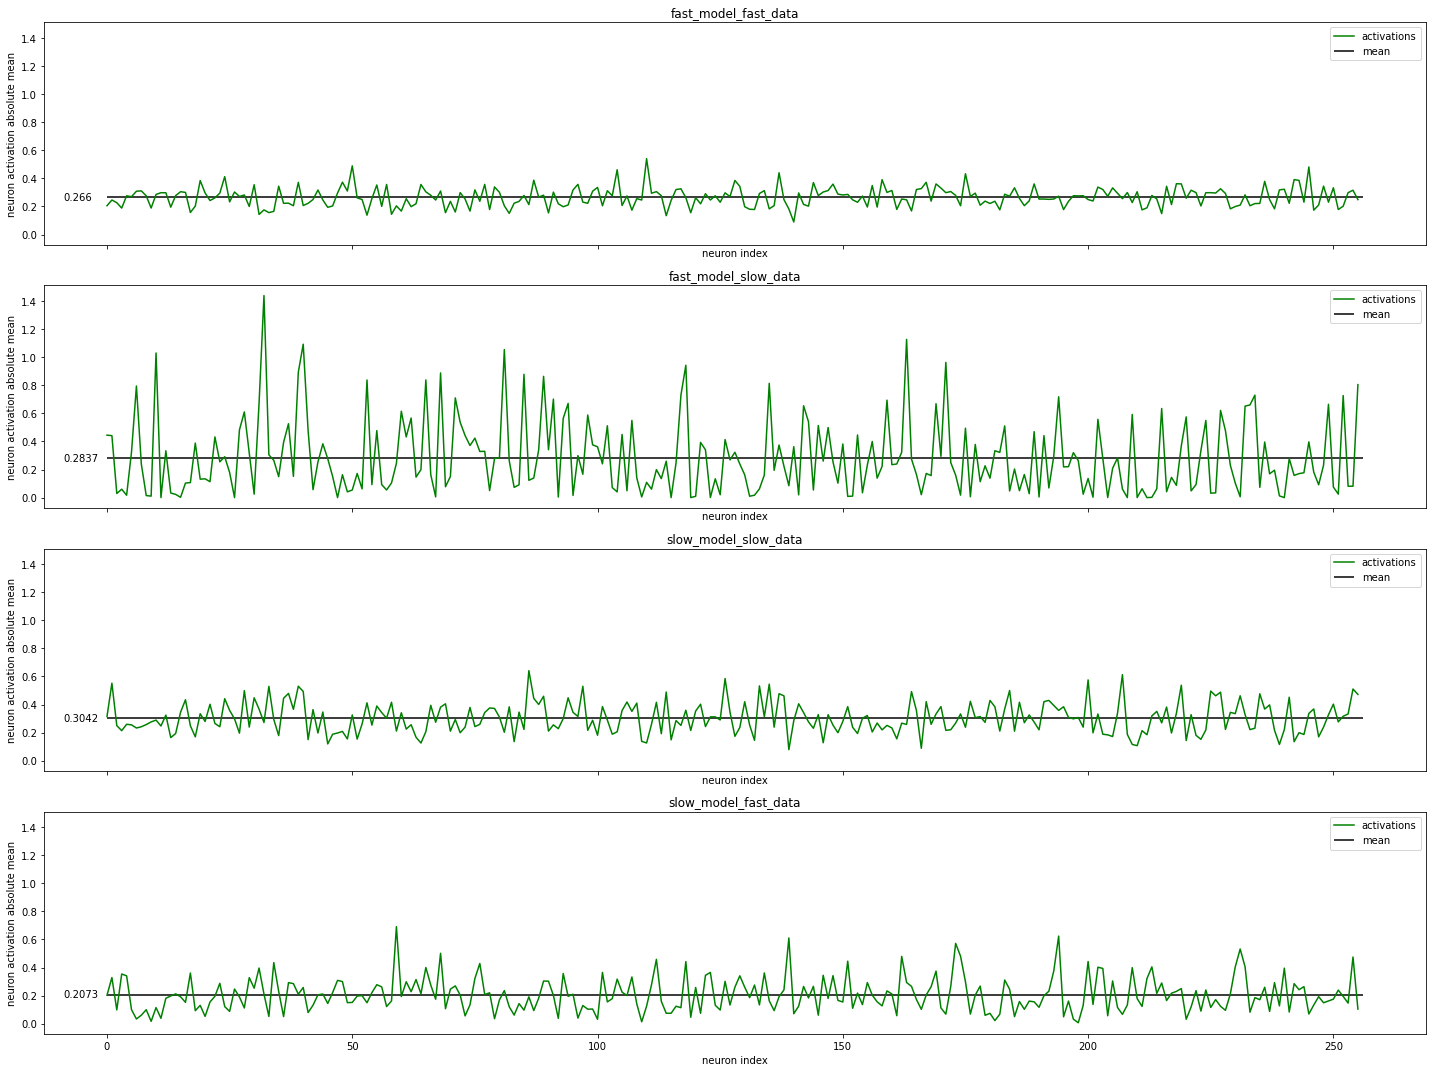

In [194]:
neuron_activations = dict(
    fast_model_fast_data=np.abs(fast_model_fast_data).mean(axis=0),
    fast_model_slow_data=np.abs(fast_model_slow_data).mean(axis=0),
    slow_model_slow_data=np.abs(slow_model_slow_data).mean(axis=0),
    slow_model_fast_data=np.abs(slow_model_fast_data).mean(axis=0),
)

plot_activations(neuron_activations, 'neuron activation absolute mean', 'neuron index')

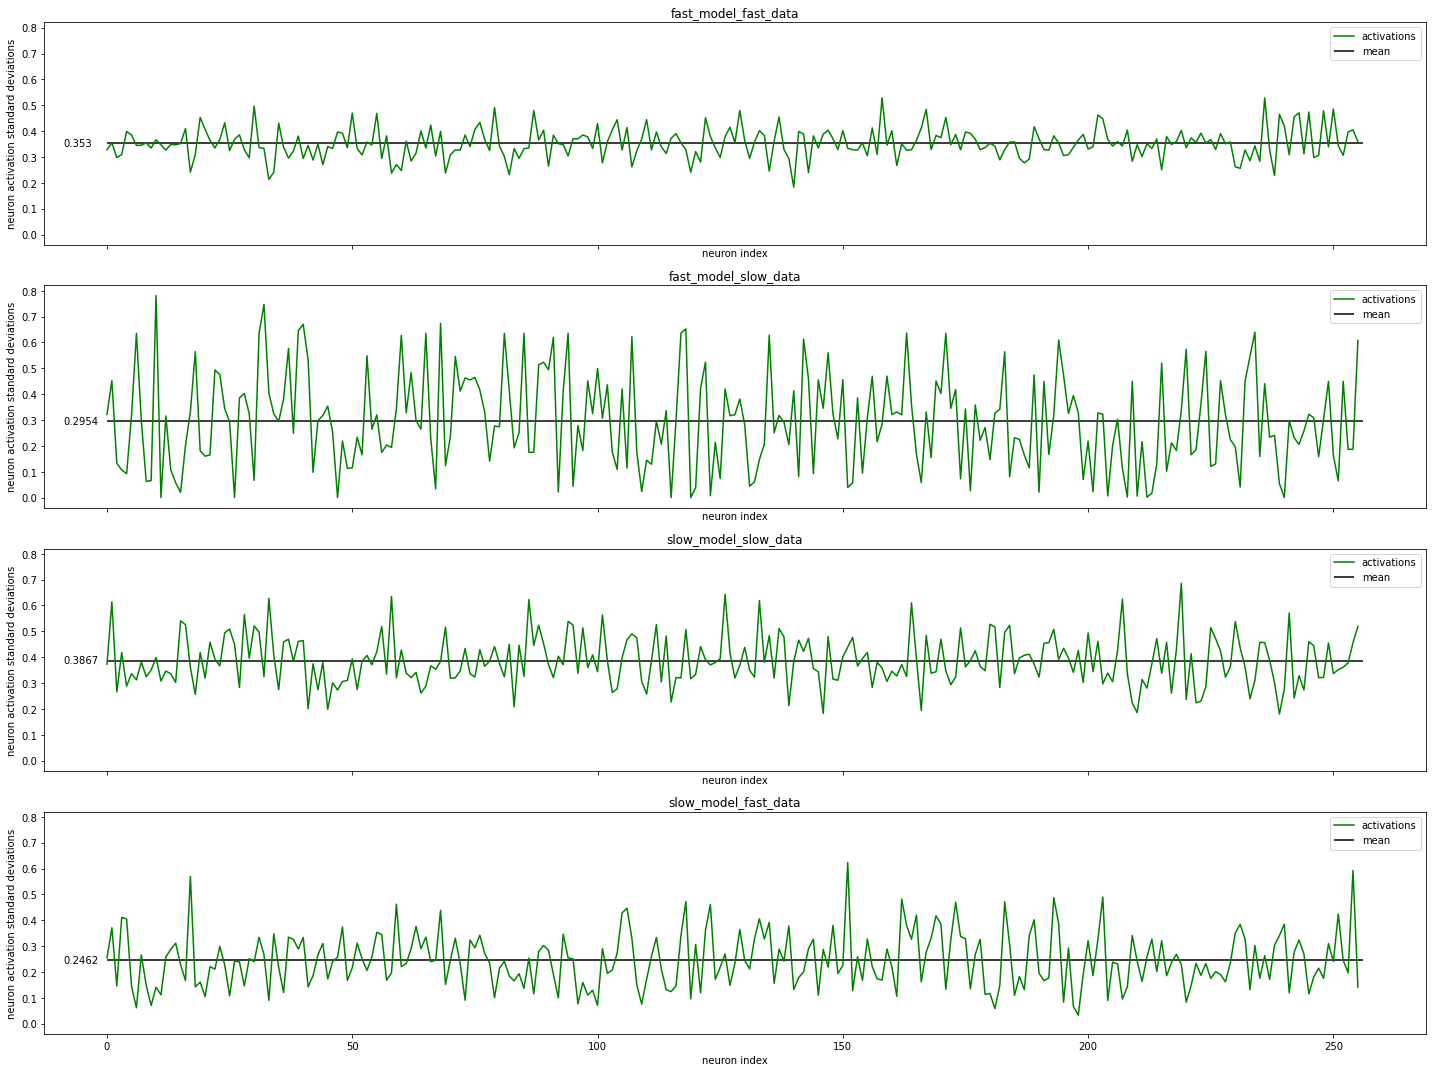

In [195]:
neuron_activations = dict(
    fast_model_fast_data=fast_model_fast_data.std(axis=0),
    fast_model_slow_data=fast_model_slow_data.std(axis=0),
    slow_model_slow_data=slow_model_slow_data.std(axis=0),
    slow_model_fast_data=slow_model_fast_data.std(axis=0),
)

plot_activations(neuron_activations, 'neuron activation standard deviations', 'neuron index')